In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# adding import pandas to examine running query using Panda
import pandas as pd


In [4]:
#Use the SQLAlchemy create_engine() function to connect to your SQLite database.

engine = create_engine('sqlite:///Resources/hawaii.sqlite')


In [5]:
#Use the SQLAlchemy automap_base() function to reflect your tables into classes
Base = automap_base()
Base.prepare(engine, reflect=True)

/Users/farrukh/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#view all the classes inside the table
Base.classes.keys()

['station', 'measurement']

In [7]:
#Save references to the classes named station and measurement
Measurement = Base.classes.measurement
Station = Base.classes.station



In [8]:
#Link Python to the database by creating a SQLAlchemy session

# Create a session
session = Session(engine)

# Use the session to query the database
results = session.query(Station.name, Measurement.date, Measurement.prcp).\
    filter(Station.station == Measurement.station).\
    filter(Measurement.date >= '2017-01-01').\
    all()

# Print the results
for result in results:
    print(result)

# Close the session
session.close()


('WAIKIKI 717.2, HI US', '2017-01-01', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-02', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-03', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-04', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-05', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-06', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-07', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-08', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-09', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-10', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-11', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-12', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-13', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-14', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-15', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-16', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-17', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-18', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-19', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-20', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-21', 0.0)
('WAIKIKI 717.2, HI US', '2017-01-22', 0.16)
('WAIKIKI 717.2, HI US', '2017-

# Exploratory Station Analysis

In [9]:
# Find the most recent date in the dataset
#from sqlalchemy import func
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f"The most recent date in the dataset is {most_recent_date}")


The most recent date in the dataset is 2017-08-23


In [10]:
# Design a query to calculate the total number stations in the dataset

num_stations = session.query(func.count(Station.station)).scalar()
print(f'Total number of stations: {num_stations}')

Total number of stations: 9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()[0]

# print the results
print("Most active stations:")
for station in most_active:
    print(f"Station: {station[0]}, Count: {station[1]}")

Most active stations:
Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

# print the results
print(f"Temperature for station {most_active_station}:")
print(f"Lowest temperature: {temps[0][0]}")
print(f"Highest temperature: {temps[0][1]}")
print(f"Average temperature: {round(temps[0][2], 2)}")


Temperature for station USC00519281:
Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66


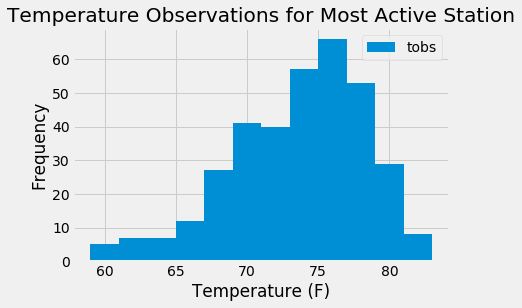

In [18]:
# query the last 12 months of temperature observation data for the most active station
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
temps = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= query_date).all()

# put the temperature data into a pandas dataframe
temps_df = pd.DataFrame(temps, columns=["tobs"])

# plot the results as a histogram
temps_df.plot.hist(bins=12, title="Temperature Observations for Most Active Station")
plt.xlabel("Temperature (F)")
plt.show()

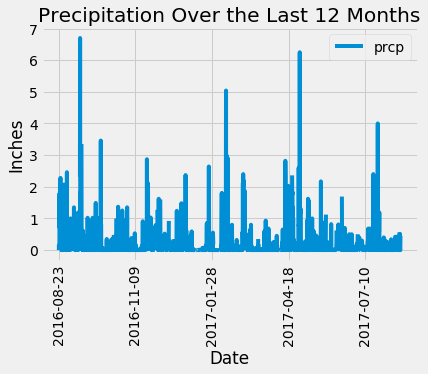

In [19]:
# put the precipitation data into a pandas dataframe
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    order_by(Measurement.date).all()

# put the precipitation data into a pandas dataframe
precip_df = pd.DataFrame(precipitation, columns=["date", "prcp"])

# set the index to the "date" column
precip_df.set_index("date", inplace=True)

# sort the DataFrame values by "date"
precip_df.sort_values("date", inplace=True)

# plot the results
precip_df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Over the Last 12 Months")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()